#### All modifications - repeat 10 times

This experiment involves the default setup for all the parameters on GlusterFS (IARAI server local non-scratch local storage), however with the reduced dataset size to 35000, as explained in the write up. The expeirment is repeated 10 times, and here, we are interested in measurement consistency, i.e. throughput dispersion between different experiments. 

In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
impls = ["threaded", "asyncio", "vanilla"]
libs = ["torch", "lightning"]

In [3]:
def add_stats(throughputs):
    df = throughputs.T

    mean = df.mean(axis=1)
    var = df.var(axis=1)
    std = df.std(axis=1)

    df["mean"] = mean.round(2)
    df["var"] = var.round(2)
    df["std"] = std.round(2)
    return df

### TU-1 ... CEPH object store

In [4]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/1701ceph-os")
base_folder = "ceph_"

# Load data
results_cephos = load_all_experiments(output_base_folder, base_folder, 7, "/*benchmark_e2e*", "")

Working with 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2092/2092 [00:11<00:00, 178.52it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2092/2092 [00:04<00:00, 466.15it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2092/2092 [07:52<00:00,  4.43it/s]


Working with 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2098/2098 [00:13<00:00, 160.74it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2098/2098 [00:04<00:00, 450.78it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2098/2098 [08:02<00:00,  4.35it/s]


Working with 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2097/2097 [00:12<00:00, 167.14it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2097/2097 [00:05<00:00, 405.65it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2097/2097 [08:19<00:00,  4.20it/s]


Working with 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2104/2104 [00:12<00:00, 169.25it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2104/2104 [00:05<00:00, 409.63it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2104/2104 [08:39<00:00,  4.05it/s]


Working with 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2104/2104 [00:12<00:00, 172.79it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2104/2104 [00:04<00:00, 449.29it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2104/2104 [08:42<00:00,  4.03it/s]


Working with 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2098/2098 [00:12<00:00, 165.88it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2098/2098 [00:05<00:00, 406.77it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2098/2098 [08:41<00:00,  4.02it/s]


In [5]:
# Check the sizes
print(f"Experiments loaded ... CEPH Object store: {len(results_cephos)}")

Experiments loaded ... CEPH Object store: 6


In [16]:
throughput_all_cephos = plot_all_histograms(results_cephos, impls, libs, False) # display = False (doesn't plot histogrms)

In [26]:
df_throughput = add_stats(throughput_all_cephos)
df_throughput
df_throughput.to_csv("df_t_ceph_os_imgs.csv")

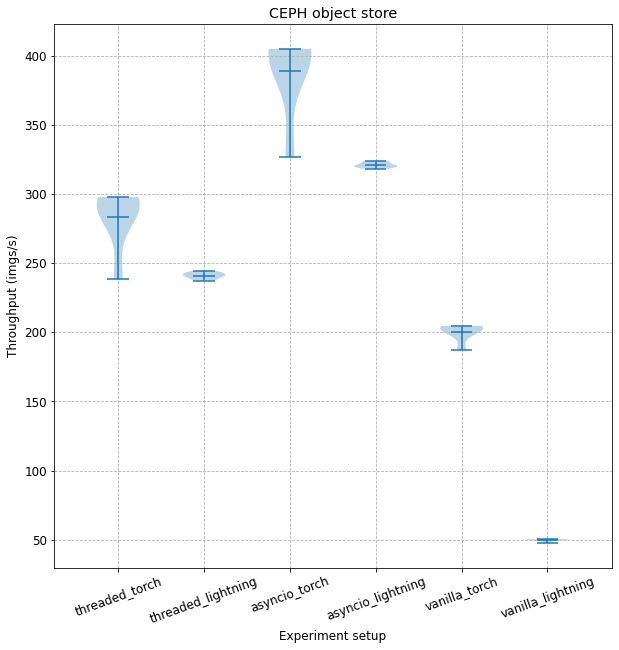

In [27]:
plot_violins(df_throughput, "CEPH object store")

In [28]:
runtime_all_cephos = plot_all_histograms(results_cephos, impls, libs, False, value="runtime") # display = False (doesn't plot histogrms)

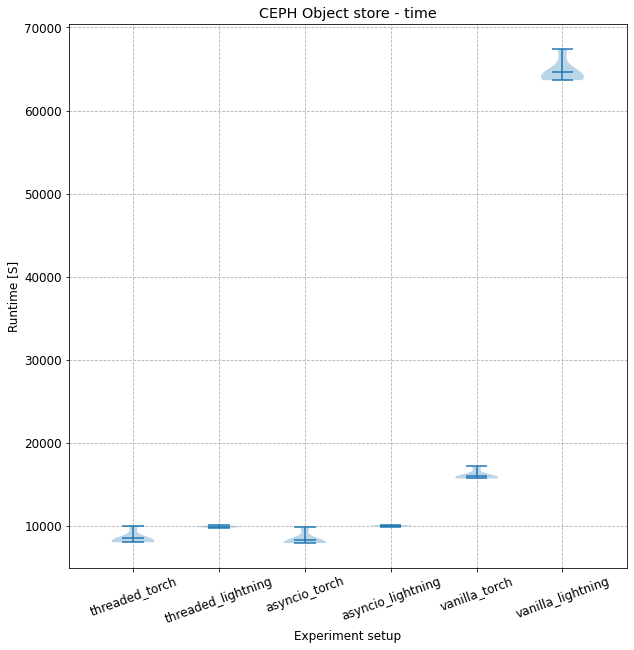

In [29]:
plot_violins(add_stats(runtime_all_cephos), "CEPH Object store - time", "Runtime [S]")

In [30]:
t = add_stats(runtime_all_cephos)

In [31]:
t

,0,1,2,3,4,5,mean,var,std
threaded_torch,10025.96,8025.03,8132.14,8258.64,8265.53,8221.87,8488.20,575844.48,758.84
threaded_lightning,9991.67,9783.06,10073.23,9875.67,9917.41,9863.19,9917.37,10505.27,102.50
asyncio_torch,9839.17,7944.83,7942.06,7932.78,8085.30,8080.52,8304.11,570465.56,755.29
asyncio_lightning,9918.40,9932.68,10027.18,10031.85,10092.24,10033.01,10005.89,4466.64,66.83
vanilla_torch,17150.39,15831.51,15699.84,15913.45,15773.04,15929.20,16049.57,298230.47,546.10
vanilla_lightning,67425.42,63658.29,63891.90,64208.76,64354.83,64188.38,64621.26,1950223.37,1396.50


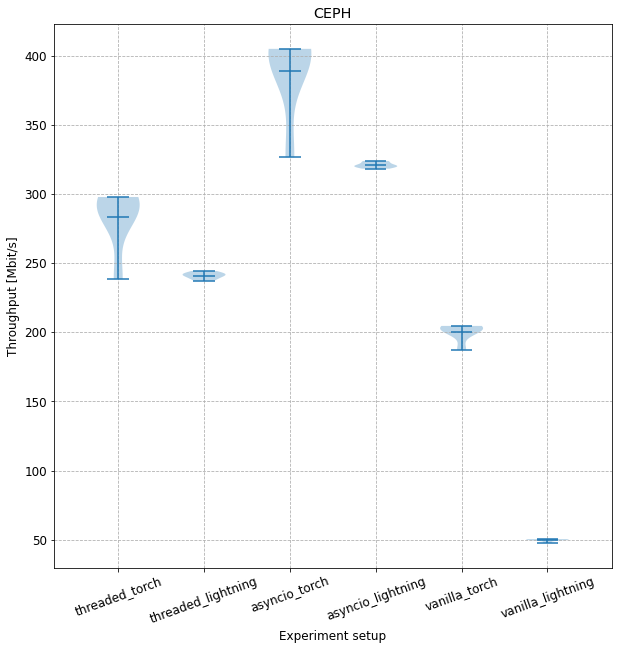

In [32]:
### mibts
runtime_all_cephos = plot_all_histograms(results_cephos, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)
plot_violins(add_stats(runtime_all_cephos), "CEPH", "Throughput [Mbit/s]")

In [33]:
# Throughput in Mbit/s
throughput_all_cephos = plot_all_histograms(results_cephos, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)
df_t_cephos = add_stats(throughput_all_cephos)
df_t_cephos

,0,1,2,3,4,5,mean,var,std
threaded_torch,238.40,297.84,293.92,289.42,289.17,290.71,283.24,493.40,22.21
threaded_lightning,239.22,244.32,237.28,242.03,241.01,242.33,241.03,6.17,2.48
asyncio_torch,326.50,404.35,404.49,404.96,397.32,397.56,389.20,955.76,30.92
asyncio_lightning,323.89,323.42,320.37,320.23,318.31,320.19,321.07,4.61,2.15
vanilla_torch,187.31,202.92,204.62,201.87,203.67,201.67,200.34,41.99,6.48
vanilla_lightning,47.64,50.46,50.28,50.03,49.92,50.05,49.73,1.09,1.04


In [34]:
df_t_cephos.to_csv("df_t_ceph_os_mbit.csv")